In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
#loading the House dataset
data = pd.read_csv("Bengaluru_House_Data.csv")
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
data.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [5]:
data.shape

(13320, 9)

<AxesSubplot:xlabel='total_sqft', ylabel='price'>

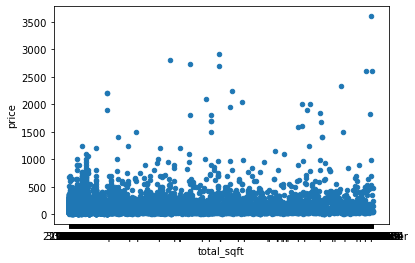

In [458]:
data.plot.scatter(x="total_sqft",y="price")

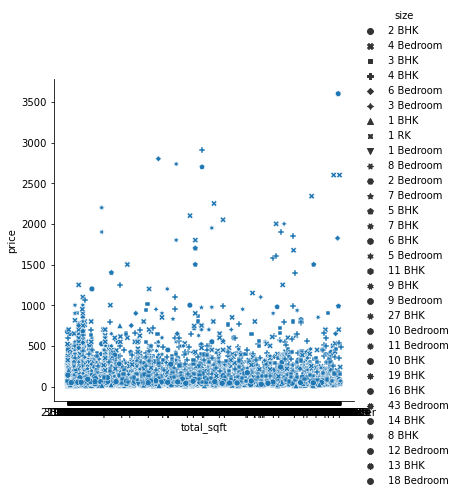

In [459]:
sns.relplot(x = 'total_sqft', y = 'price', style = 'size', data = data)

# Performing EDA

In [6]:
data.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
#checking for record where location value is nan 
data[data["location"].isna()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0


In [8]:
data[data["society"]=="Grare S"]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0
12238,Carpet Area,Ready To Move,Anantapura,3 BHK,Grare S,1600,3.0,2.0,77.0


In [9]:
data["location"].fillna("Anantapura",inplace=True)

In [10]:
data.isna().sum()

area_type          0
availability       0
location           0
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [11]:
data.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [12]:
data["size"] = data["size"].str.split(" ").str[0]

In [13]:
data["size"].value_counts()

2     5528
3     4857
4     1417
1      656
5      356
6      221
7      100
8       89
9       54
10      14
11       4
14       1
13       1
19       1
27       1
18       1
16       1
12       1
43       1
Name: size, dtype: int64

In [14]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,NaN,1200,2.0,1.0,51.00


In [15]:
data["size"] = data["size"].astype(str)
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2,NaN,1200,2.0,1.0,51.00


In [16]:
data.rename({"size":"bhk"},axis=1,inplace=True)

In [17]:
#dropping availability column as it doesnt impact on our prediction
data.drop("availability",axis=1,inplace=True)

In [18]:
#dropping column society as it nearly contains 42% values as NULL. 
data.drop("society",axis=1,inplace=True)

In [19]:
data.head()

,area_type,location,bhk,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056,2.0,1.0,39.07
1,Plot Area,Chikka Tirupathi,4,2600,5.0,3.0,120.00
2,Built-up Area,Uttarahalli,3,1440,2.0,3.0,62.00
3,Super built-up Area,Lingadheeranahalli,3,1521,3.0,1.0,95.00
4,Super built-up Area,Kothanur,2,1200,2.0,1.0,51.00


In [20]:
data.isna().sum()

area_type       0
location        0
bhk             0
total_sqft      0
bath           73
balcony       609
price           0
dtype: int64

In [21]:
#placing mean of column balcony to all null values present in balcony column.
data["balcony"].fillna(data["balcony"].mean(),inplace=True)

In [22]:
data.isna().sum()

area_type      0
location       0
bhk            0
total_sqft     0
bath          73
balcony        0
price          0
dtype: int64

<AxesSubplot:>

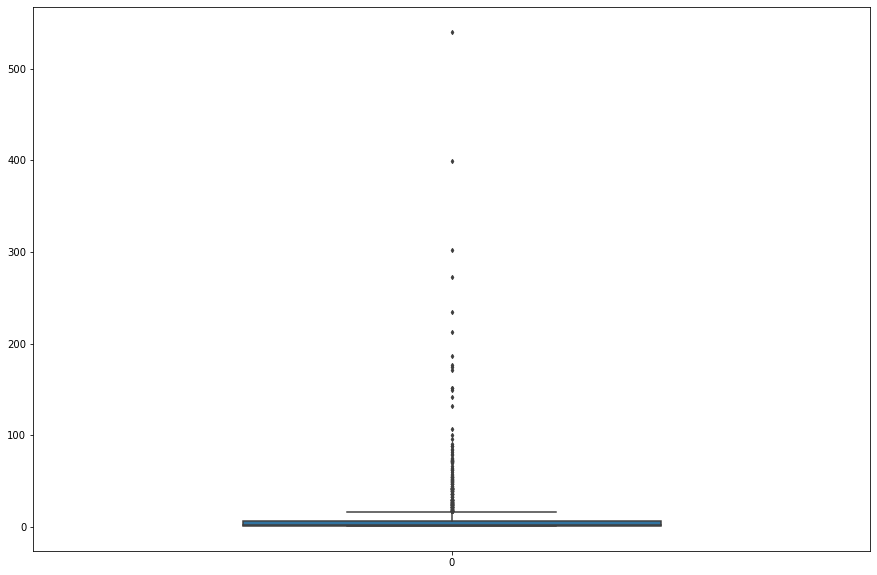

In [23]:
#checking for top frequently occuring locations.
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data["location"].value_counts(), width= 0.5,ax=ax,  fliersize=3)

In [24]:
data["location"].value_counts().unique()

array([540, 399, 302, 273, 234, 213, 186, 177, 175, 171, 152, 149, 142,
       132, 107, 100,  96,  91,  88,  85,  84,  82,  80,  79,  75,  74,
        73,  72,  71,  70,  66,  64,  63,  62,  60,  58,  57,  56,  55,
        54,  53,  52,  51,  50,  49,  48,  47,  45,  44,  43,  42,  41,
        40,  39,  38,  37,  36,  35,  34,  33,  31,  30,  29,  28,  27,
        26,  25,  24,  23,  22,  21,  20,  19,  18,  17,  16,  15,  14,
        13,  12,  11,  10,   9,   8,   7,   6,   5,   4,   3,   2,   1],
      dtype=int64)

In [25]:
#getting data for only most frequent locations. considering only top 25 locations of bengaluru
df = data["location"].value_counts()[:25]
data = data[data["location"].isin(df.index)]
data.head()

,area_type,location,bhk,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056,2.0,1.000000,39.07
2,Built-up Area,Uttarahalli,3,1440,2.0,3.000000,62.00
5,Super built-up Area,Whitefield,2,1170,2.0,1.000000,38.00
7,Super built-up Area,Rajaji Nagar,4,3300,4.0,1.584376,600.00
8,Super built-up Area,Marathahalli,3,1310,3.0,1.000000,63.25


In [26]:
data["area_type"].value_counts()

Super built-up  Area    3285
Built-up  Area           673
Plot  Area               322
Carpet  Area              18
Name: area_type, dtype: int64

In [27]:
data.head()

,area_type,location,bhk,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056,2.0,1.000000,39.07
2,Built-up Area,Uttarahalli,3,1440,2.0,3.000000,62.00
5,Super built-up Area,Whitefield,2,1170,2.0,1.000000,38.00
7,Super built-up Area,Rajaji Nagar,4,3300,4.0,1.584376,600.00
8,Super built-up Area,Marathahalli,3,1310,3.0,1.000000,63.25


In [28]:
data["total_sqft"].value_counts()

1200           162
1100            61
1500            46
1000            45
1140            43
              ... 
1990             1
1482 - 1684      1
624              1
1117             1
1.26Acres        1
Name: total_sqft, Length: 1211, dtype: int64

In [29]:
def make_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [30]:
data["total_sqft"].apply(make_float)

0        True
2        True
5        True
7        True
8        True
         ... 
13309    True
13312    True
13313    True
13315    True
13317    True
Name: total_sqft, Length: 4298, dtype: bool

In [31]:
def sqft_to_num(x):
    val = x.split('-')
    if len(val) == 2:
        return (float(val[0])+float(val[1]))/2
    try:
        return float(x)
    except:
        return None

In [32]:
df = data.copy()
df["total_sqft"] = df["total_sqft"].apply(sqft_to_num)
df = df[df["total_sqft"].notnull()]
df.head()

,area_type,location,bhk,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2,1056.0,2.0,1.000000,39.07
2,Built-up Area,Uttarahalli,3,1440.0,2.0,3.000000,62.00
5,Super built-up Area,Whitefield,2,1170.0,2.0,1.000000,38.00
7,Super built-up Area,Rajaji Nagar,4,3300.0,4.0,1.584376,600.00
8,Super built-up Area,Marathahalli,3,1310.0,3.0,1.000000,63.25


In [33]:
df["total_sqft"]

0        1056.0
2        1440.0
5        1170.0
7        3300.0
8        1310.0
          ...  
13309    1675.0
13312    1262.0
13313    1345.0
13315    3453.0
13317    1141.0
Name: total_sqft, Length: 4290, dtype: float64

In [34]:
df['bhk'] = pd.to_numeric(df['bhk'], errors='coerce')

In [35]:
df['bath'] = pd.to_numeric(df['bath'], errors='coerce')

In [36]:
df.dtypes

area_type      object
location       object
bhk           float64
total_sqft    float64
bath          float64
balcony       float64
price         float64
dtype: object

In [37]:
data.isna().sum()

area_type      0
location       0
bhk            0
total_sqft     0
bath          38
balcony        0
price          0
dtype: int64

In [38]:
df = pd.get_dummies(data=df,columns=["area_type","location"])
df.head()

,bhk,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_7th Phase JP Nagar,...,location_Marathahalli,location_Raja Rajeshwari Nagar,location_Rajaji Nagar,location_Sarjapur,location_Sarjapur Road,location_Thanisandra,location_Uttarahalli,location_Whitefield,location_Yelahanka,location_Yeshwanthpur
0,2.0,1056.0,2.0,1.000000,39.07,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,3.0,1440.0,2.0,3.000000,62.00,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
5,2.0,1170.0,2.0,1.000000,38.00,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
7,4.0,3300.0,4.0,1.584376,600.00,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
8,3.0,1310.0,3.0,1.000000,63.25,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [39]:
df = df.dropna()

In [40]:
df.isna().sum()

bhk                                  0
total_sqft                           0
bath                                 0
balcony                              0
price                                0
area_type_Built-up  Area             0
area_type_Carpet  Area               0
area_type_Plot  Area                 0
area_type_Super built-up  Area       0
location_7th Phase JP Nagar          0
location_Bannerghatta Road           0
location_Begur Road                  0
location_Bellandur                   0
location_Chandapura                  0
location_Electronic City             0
location_Electronic City Phase II    0
location_Electronics City Phase 1    0
location_Haralur Road                0
location_Hebbal                      0
location_Hennur Road                 0
location_Hoodi                       0
location_KR Puram                    0
location_Kanakpura Road              0
location_Kasavanhalli                0
location_Marathahalli                0
location_Raja Rajeshwari 

In [41]:
df.shape

(4252, 34)

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()
housing_data = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [44]:
housing_data

,bhk,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_7th Phase JP Nagar,...,location_Marathahalli,location_Raja Rajeshwari Nagar,location_Rajaji Nagar,location_Sarjapur,location_Sarjapur Road,location_Thanisandra,location_Uttarahalli,location_Whitefield,location_Yelahanka,location_Yeshwanthpur
0,-0.665381,-0.460953,-0.508614,-0.766743,-0.534276,-0.431339,-0.065202,-0.28189,0.553805,-0.189901,...,-0.207180,-0.204699,-0.159896,-0.138475,-0.318676,-0.240232,-0.213881,-0.378168,-0.227935,-0.142823
1,0.402241,-0.097175,-0.508614,1.835468,-0.325054,2.318364,-0.065202,-0.28189,-1.805691,-0.189901,...,-0.207180,-0.204699,-0.159896,-0.138475,-0.318676,-0.240232,4.675491,-0.378168,-0.227935,-0.142823
2,-0.665381,-0.352956,-0.508614,-0.766743,-0.544040,-0.431339,-0.065202,-0.28189,0.553805,-0.189901,...,-0.207180,-0.204699,-0.159896,-0.138475,-0.318676,-0.240232,-0.213881,2.644330,-0.227935,-0.142823
3,1.469863,1.664872,1.390926,-0.006409,4.583882,-0.431339,-0.065202,-0.28189,0.553805,-0.189901,...,-0.207180,-0.204699,6.254055,-0.138475,-0.318676,-0.240232,-0.213881,-0.378168,-0.227935,-0.142823
4,0.402241,-0.220329,0.441156,-0.766743,-0.313648,-0.431339,-0.065202,-0.28189,0.553805,-0.189901,...,4.826711,-0.204699,-0.159896,-0.138475,-0.318676,-0.240232,-0.213881,-0.378168,-0.227935,-0.142823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4247,0.402241,0.125449,0.441156,-0.006409,-0.050135,-0.431339,-0.065202,-0.28189,0.553805,-0.189901,...,-0.207180,-0.204699,-0.159896,-0.138475,-0.318676,-0.240232,-0.213881,-0.378168,-0.227935,7.001680
4248,-0.665381,-0.265801,-0.508614,0.534362,-0.461920,-0.431339,-0.065202,-0.28189,0.553805,-0.189901,...,-0.207180,-0.204699,-0.159896,-0.138475,-0.318676,-0.240232,-0.213881,-0.378168,-0.227935,-0.142823
4249,0.402241,-0.187172,-0.508614,-0.766743,-0.370676,-0.431339,-0.065202,-0.28189,0.553805,-0.189901,...,-0.207180,-0.204699,-0.159896,-0.138475,-0.318676,-0.240232,4.675491,-0.378168,-0.227935,-0.142823
4250,2.537485,1.809815,1.390926,-2.067849,1.216973,2.318364,-0.065202,-0.28189,-1.805691,-0.189901,...,-0.207180,-0.204699,-0.159896,-0.138475,-0.318676,-0.240232,-0.213881,2.644330,-0.227935,-0.142823


In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = housing_data.drop("price",axis=1)

In [47]:
y = housing_data["price"]

In [48]:
train_x,test_x,train_y,test_y = train_test_split(X,y,test_size=0.20,random_state=355)

In [49]:
train_x

,bhk,total_sqft,bath,balcony,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_7th Phase JP Nagar,location_Bannerghatta Road,...,location_Marathahalli,location_Raja Rajeshwari Nagar,location_Rajaji Nagar,location_Sarjapur,location_Sarjapur Road,location_Thanisandra,location_Uttarahalli,location_Whitefield,location_Yelahanka,location_Yeshwanthpur
2875,-0.665381,-0.234539,-0.508614,0.534362,-0.431339,-0.065202,-0.281890,0.553805,-0.189901,-0.191886,...,-0.20718,4.885233,-0.159896,-0.138475,-0.318676,-0.240232,-0.213881,-0.378168,-0.227935,-0.142823
2577,0.402241,-0.154015,0.441156,1.835468,-0.431339,-0.065202,-0.281890,0.553805,-0.189901,-0.191886,...,-0.20718,-0.204699,6.254055,-0.138475,-0.318676,-0.240232,-0.213881,-0.378168,-0.227935,-0.142823
3400,0.402241,-0.116122,0.441156,0.534362,-0.431339,-0.065202,-0.281890,0.553805,-0.189901,-0.191886,...,-0.20718,-0.204699,-0.159896,-0.138475,-0.318676,-0.240232,-0.213881,-0.378168,-0.227935,-0.142823
357,0.402241,0.961001,0.441156,0.534362,-0.431339,-0.065202,-0.281890,0.553805,-0.189901,-0.191886,...,-0.20718,-0.204699,-0.159896,-0.138475,-0.318676,-0.240232,-0.213881,-0.378168,-0.227935,7.001680
2428,0.402241,0.435228,0.441156,0.534362,-0.431339,-0.065202,-0.281890,0.553805,-0.189901,-0.191886,...,-0.20718,-0.204699,-0.159896,-0.138475,-0.318676,-0.240232,-0.213881,-0.378168,-0.227935,-0.142823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4083,-0.665381,-0.216540,-0.508614,-2.067849,-0.431339,-0.065202,3.547487,-1.805691,-0.189901,-0.191886,...,-0.20718,-0.204699,6.254055,-0.138475,-0.318676,-0.240232,-0.213881,-0.378168,-0.227935,-0.142823
3985,-0.665381,-0.309379,-0.508614,-0.766743,-0.431339,-0.065202,-0.281890,0.553805,-0.189901,-0.191886,...,-0.20718,-0.204699,-0.159896,-0.138475,-0.318676,-0.240232,-0.213881,2.644330,-0.227935,-0.142823
2099,0.402241,-0.210856,-0.508614,-0.766743,2.318364,-0.065202,-0.281890,-1.805691,-0.189901,-0.191886,...,-0.20718,-0.204699,-0.159896,-0.138475,-0.318676,-0.240232,-0.213881,-0.378168,-0.227935,-0.142823
3418,-0.665381,-0.458111,-0.508614,-0.766743,2.318364,-0.065202,-0.281890,-1.805691,-0.189901,-0.191886,...,-0.20718,-0.204699,-0.159896,-0.138475,-0.318676,-0.240232,-0.213881,2.644330,-0.227935,-0.142823


In [50]:
train_y

2875   -0.490206
2577    0.295407
3400   -0.325054
357     0.395775
2428    0.204163
          ...   
4083    1.162226
3985   -0.206436
2099   -0.542853
3418   -0.370676
2690   -0.434547
Name: price, Length: 3401, dtype: float64

In [51]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(train_x,train_y)

LinearRegression()

In [52]:
model.score(train_x,train_y)

0.5712946735585153

In [53]:
model.score(test_x,test_y)

0.6703404249901446

In [54]:
#function to carry out adjusted-rsquared value
def adjusted_rsquared(x,y):
    r2 = model.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [55]:
adjusted_rsquared(train_x,train_y)

0.5670929284523172

In [56]:
adjusted_rsquared(test_x,test_y)

0.6570249219603708

In [57]:
#r-squared method gives us more accuracy

In [58]:
#Lets see if our model is overfitting the data
#using lassoCV

In [59]:
from sklearn.linear_model import Lasso,Ridge,LassoCV, RidgeCV

In [60]:
lasscv = LassoCV(alphas=None,cv=10,max_iter=100000,normalize=True)
lasscv.fit(train_x,train_y)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [61]:
best_param = lasscv.alpha_
best_param

1.928027077112682e-05

In [62]:
lasso_reg = Lasso(best_param)
lasso_reg.fit(train_x,train_y)

C:\Users\Raj\anaconda3x\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.607077588987522, tolerance: 0.35560456461907125
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=1.928027077112682e-05)

In [63]:
lasso_reg.score(test_x,test_y)

0.6704806893893158

In [64]:
#using RidgeCV
alpha = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alpha, cv=10, normalize=True)
ridgecv.fit(train_x,train_y)

RidgeCV(alphas=array([5.7897471 , 9.80380755, 0.24093722, 2.59738173, 6.4061572 ,
       9.05403618, 9.68428317, 1.2920397 , 8.93792896, 8.81832044,
       1.48991478, 7.27818343, 1.82538513, 1.13745986, 2.34738641,
       4.74387527, 5.48087319, 1.89949088, 6.55658191, 5.71260405,
       1.04090347, 4.27577377, 6.58017008, 6.95511583, 3.23532817,
       1.41538912, 6.17997448, 1.73997558, 4.96949553, 5.35005437,
       7.28058149, 8.42968672, 6.71473318, 8.03143175, 6.00647067,
       3.78548659, 1.88242069, 4.3846777 , 9.97583779, 8.92667312,
       4.66698362, 9.52388832, 5.2939529 , 1.23930653, 9.74185108,
       4.52912463, 3.83210646, 3.18175969, 5.60113595, 4.36305703]),
        cv=10, normalize=True)

In [65]:
best_param_ridge = ridgecv.alpha_
best_param_ridge

0.2409372230919915

In [66]:
ridge = Ridge(alpha=best_param_ridge)
ridge.fit(train_x,train_y)

Ridge(alpha=0.2409372230919915)

In [67]:
ridge.score(test_x,test_y)

0.6704666022963074